# Task #1:Prediction using Unsupervised ML
Dataset:Iris dataset

In [ ]:
import pandas as pd
import numpy as np
from  sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from  sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [15]:
# Load the iris datasetv 
iris = pd.read_csv('Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
iris.Species.replace(('Iris-setosa','Iris-versicolor','Iris-virginica'),(0,1,2),inplace =True)

In [21]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [27]:
#to covert male and female to  0 and 1  
encoder = LabelEncoder()
iris['Species'] = encoder.fit_transform(iris['Species'])


In [29]:
scaler = StandardScaler()
scaled_data =pd.DataFrame(scaler.fit_transform(iris), columns=iris.columns)
scaled_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,-1.720542,-0.900681,1.032057,-1.341272,-1.312977,-1.224745
1,-1.697448,-1.143017,-0.124958,-1.341272,-1.312977,-1.224745
2,-1.674353,-1.385353,0.337848,-1.398138,-1.312977,-1.224745
3,-1.651258,-1.506521,0.106445,-1.284407,-1.312977,-1.224745
4,-1.628164,-1.021849,1.263460,-1.341272,-1.312977,-1.224745
...,...,...,...,...,...,...
145,1.628164,1.038005,-0.124958,0.819624,1.447956,1.224745
146,1.651258,0.553333,-1.281972,0.705893,0.922064,1.224745
147,1.674353,0.795669,-0.124958,0.819624,1.053537,1.224745
148,1.697448,0.432165,0.800654,0.933356,1.447956,1.224745


# elbow method

In [40]:
max_clusters =  20

In [41]:
kmeans_tests =[KMeans(n_clusters=i, n_init =10) for i in range(1,max_clusters)]
inertias  = [kmeans_tests[i].fit(scaled_data).inertia_ for i in range(len(kmeans_tests))]

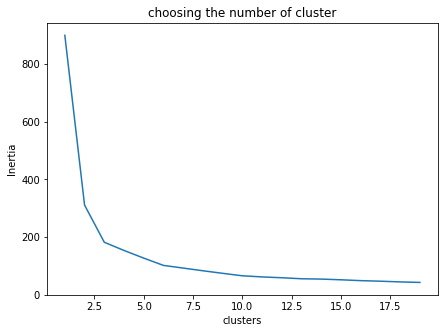

In [42]:
plt.figure(figsize=(7,5))
plt.plot(range(1,max_clusters),inertias)
plt.xlabel('clusters')
plt.ylabel('Inertia')
plt.title('choosing the number of cluster')
plt.show()

In [43]:
kmeans =KMeans(n_clusters =10,n_init =10)
kmeans.fit(scaled_data)

KMeans(n_clusters=10)

In [44]:
clusters =kmeans.predict(scaled_data)
clusters

array([6, 1, 1, 1, 6, 4, 6, 6, 1, 1, 4, 6, 1, 1, 4, 4, 4, 6, 4, 4, 6, 6,
       6, 6, 6, 1, 6, 6, 6, 1, 1, 6, 4, 4, 1, 1, 6, 1, 1, 6, 6, 1, 1, 6,
       4, 1, 4, 1, 6, 6, 0, 0, 0, 5, 0, 0, 0, 5, 0, 5, 5, 0, 5, 0, 0, 0,
       0, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 0, 0, 0, 0, 5,
       0, 5, 5, 0, 5, 5, 5, 0, 0, 0, 5, 0, 7, 3, 9, 3, 7, 9, 8, 9, 3, 2,
       7, 3, 7, 8, 3, 7, 3, 2, 9, 8, 7, 3, 9, 3, 7, 9, 3, 3, 3, 9, 9, 2,
       3, 3, 8, 9, 7, 7, 3, 7, 7, 7, 3, 7, 7, 7, 8, 7, 7, 3])

In [45]:
pca = PCA(n_components=2)

reduced_data = pd.DataFrame(pca.fit_transform(scaled_data), columns=['PC1', 'PC2'])

In [46]:
reduced_data

,PC1,PC2
0,-3.068709,0.501704
1,-2.916358,-0.655182
2,-3.122922,-0.325780
3,-3.061356,-0.581791
4,-3.123992,0.665657
...,...,...
145,2.719659,0.379443
146,2.488100,-0.914479
147,2.466685,0.255178
148,2.372269,0.998612


In [47]:
kmeans.cluster_centers_

array([[-3.31518167e-02,  3.96987636e-01, -2.07068331e-01,
         4.23398796e-01,  3.02868485e-01,  9.24446373e-33],
       [-1.14189591e+00, -1.38535265e+00, -3.49675592e-02,
        -1.33811320e+00, -1.33488889e+00, -1.22474487e+00],
       [ 1.02770632e+00,  2.12851559e+00,  1.57199748e+00,
         1.50201279e+00,  1.36030700e+00,  1.22474487e+00],
       [ 1.12585804e+00,  3.79154461e-01, -5.58838161e-01,
         8.19624347e-01,  9.13846702e-01,  1.22474487e+00],
       [-1.19146749e+00, -5.37177559e-01,  2.06285225e+00,
        -1.26889787e+00, -1.20540793e+00, -1.22474487e+00],
       [ 5.40898062e-02, -3.52237125e-01, -1.39158436e+00,
         5.94196724e-02, -5.36040671e-02,  0.00000000e+00],
       [-1.14647815e+00, -9.46840359e-01,  9.54922903e-01,
        -1.29523826e+00, -1.21280685e+00, -1.22474487e+00],
       [ 1.27495357e+00,  9.16836886e-01,  2.69788633e-01,
         9.96911542e-01,  1.35515119e+00,  1.22474487e+00],
       [ 1.13394113e+00, -5.25060772e-02, -1.374

In [48]:
reduced_centers = pca.transform(kmeans.cluster_centers_)
reduced_centers

array([[ 5.13641521e-01,  4.98949004e-04],
       [-2.79785790e+00, -6.79111066e-01],
       [ 2.81134928e+00,  2.38747083e+00],
       [ 2.09089503e+00, -3.03101687e-01],
       [-2.82649369e+00,  1.58832927e+00],
       [ 1.73607973e-01, -1.41749396e+00],
       [-2.75602929e+00,  4.10142303e-01],
       [ 2.47642485e+00,  7.01653360e-01],
       [ 1.93072596e+00, -1.24177356e+00],
       [ 2.94075875e+00,  5.58253532e-01]])

In [49]:
reduced_data['cluster'] = clusters
reduced_data

,PC1,PC2,cluster
0,-3.068709,0.501704,6
1,-2.916358,-0.655182,1
2,-3.122922,-0.325780,1
3,-3.061356,-0.581791,1
4,-3.123992,0.665657,6
...,...,...,...
145,2.719659,0.379443,7
146,2.488100,-0.914479,8
147,2.466685,0.255178,7
148,2.372269,0.998612,7


# Implementing cluster

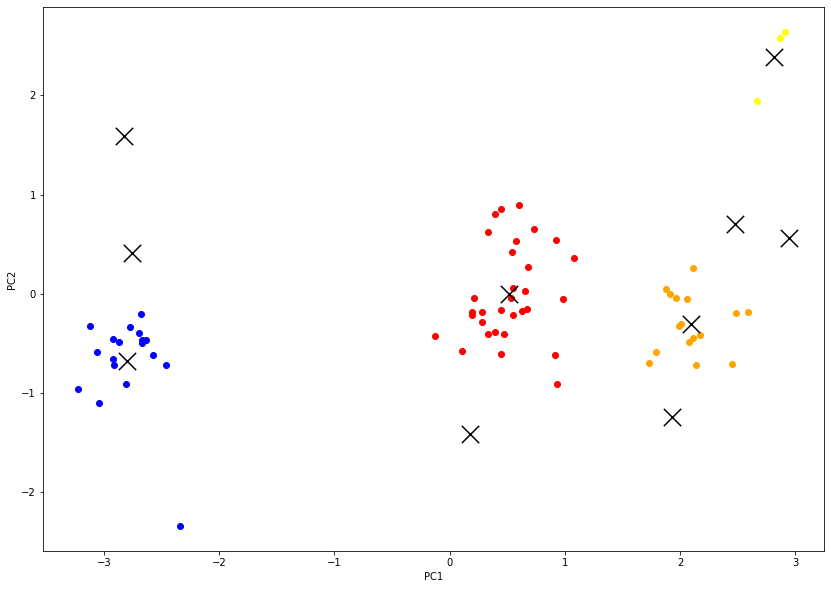

In [50]:
plt.figure(figsize=(14, 10))

plt.scatter(reduced_data[reduced_data['cluster'] == 0].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 0].loc[:, 'PC2'], color='red')
plt.scatter(reduced_data[reduced_data['cluster'] == 1].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 1].loc[:, 'PC2'], color='blue')
plt.scatter(reduced_data[reduced_data['cluster'] == 2].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 2].loc[:, 'PC2'], color='yellow')
plt.scatter(reduced_data[reduced_data['cluster'] == 3].loc[:, 'PC1'], reduced_data[reduced_data['cluster'] == 3].loc[:, 'PC2'], color='orange')


plt.scatter(reduced_centers[:, 0], reduced_centers[:, 1], color='black', marker='x', s=300)

plt.xlabel("PC1")
plt.ylabel("PC2")

plt.show()